In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/final_dataset.csv")
df.head()

,Unnamed: 0,labels,sequence,1_GAP_KMER_di_0,1_GAP_KMER_di_1,1_GAP_KMER_di_2,1_GAP_KMER_di_3,1_GAP_KMER_di_4,1_GAP_KMER_di_5,1_GAP_KMER_di_6,...,Index48_T,Index49_T,Index50_T,Index51_T,Index52_T,Index53_T,Index54_T,Index55_T,Index56_T,lables
0,0,1,TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,1,AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
3,3,1,TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1
4,4,1,AGGGGCAAGGAGGATGGAAAGAGGTTGCCGTATAAAGAAACTAGAG...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,0,0,0,1,1


In [25]:
df['labels'] = df['labels'].astype('int')
y = df.loc[:, "labels"].values
df.drop(['labels'], axis = True, inplace = True)
X = df.iloc[:, 3:].values

In [5]:
pd.DataFrame(y).value_counts()

0    53
1    52
Name: count, dtype: int64

In [6]:
X.shape

(105, 52933)

In [27]:
# Assuming X and y are already defined
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73, 52932), (32, 52932), (73,), (32,))

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import matthews_corrcoef, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

stacking = StackingClassifier(
    estimators=[
        ('XGBOOST', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('ADABOOST', LogisticRegression(max_iter=500)),
        ('RF', RandomForestClassifier())
    ],
    final_estimator=LogisticRegression(),
    cv=10
)

stacking.fit(X_train, y_train)

pred = stacking.predict(X_test)
pred_proba = stacking.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("MCC:", matthews_corrcoef(y_test, pred))
print("AUC ROC Score:", roc_auc_score(y_test, pred_proba))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC ROC Score: 1.0


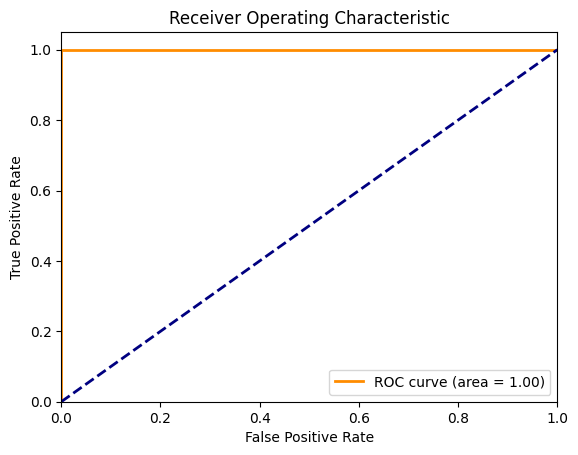

In [10]:
# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, pred_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

lR = LogisticRegression(max_iter=500)

lR.fit(X_train, y_train)

pred = lR.predict(X_test)

pred_proba = lR.predict_proba(X_test)[:, 1]


print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("MCC:", matthews_corrcoef(y_test, pred))
print("AUC ROC Score:", roc_auc_score(y_test, pred_proba))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC ROC Score: 1.0


In [14]:
from sklearn.ensemble import AdaBoostClassifier

lR = AdaBoostClassifier()

lR.fit(X_train, y_train)

pred = lR.predict(X_test)

pred_proba = lR.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("MCC:", matthews_corrcoef(y_test, pred))
print("AUC ROC Score:", roc_auc_score(y_test, pred_proba))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC ROC Score: 1.0


In [15]:
from xgboost import XGBClassifier

lR = XGBClassifier()

lR.fit(X_train, y_train)

pred = lR.predict(X_test)

pred_proba = lR.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))
print("MCC:", matthews_corrcoef(y_test, pred))
print("AUC ROC Score:", roc_auc_score(y_test, pred_proba))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC ROC Score: 1.0


Logistic Regression Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC ROC Score: 1.0

AdaBoost Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC ROC Score: 1.0

XGBoost Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0
AUC ROC Score: 1.0


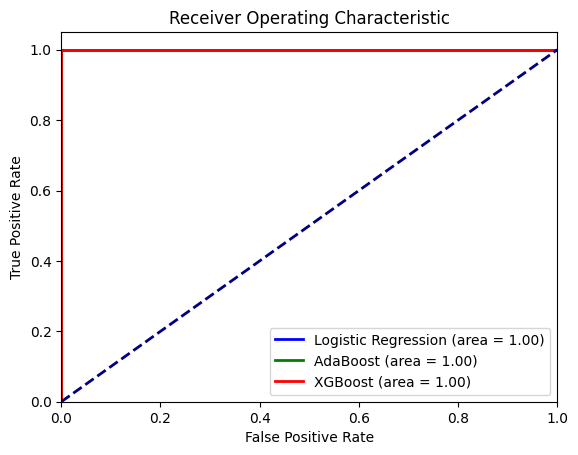

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import matthews_corrcoef, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
pred_proba_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Metrics:")
print("Precision:", precision_score(y_test, pred_lr))
print("Recall:", recall_score(y_test, pred_lr))
print("F1 Score:", f1_score(y_test, pred_lr))
print("MCC:", matthews_corrcoef(y_test, pred_lr))
print("AUC ROC Score:", roc_auc_score(y_test, pred_proba_lr))

# AdaBoost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
pred_ada = ada.predict(X_test)
pred_proba_ada = ada.predict_proba(X_test)[:, 1]

print("\nAdaBoost Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, pred_ada))
print("Precision:", precision_score(y_test, pred_ada))
print("Recall:", recall_score(y_test, pred_ada))
print("F1 Score:", f1_score(y_test, pred_ada))
print("MCC:", matthews_corrcoef(y_test, pred_ada))
print("AUC ROC Score:", roc_auc_score(y_test, pred_proba_ada))

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("\nXGBoost Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, pred_xgb))
print("Precision:", precision_score(y_test, pred_xgb))
print("Recall:", recall_score(y_test, pred_xgb))
print("F1 Score:", f1_score(y_test, pred_xgb))
print("MCC:", matthews_corrcoef(y_test, pred_xgb))
print("AUC ROC Score:", roc_auc_score(y_test, pred_proba_xgb))

# Plotting the ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, pred_proba_lr)
fpr_ada, tpr_ada, _ = roc_curve(y_test, pred_proba_ada)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_proba_xgb)

plt.figure()

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, pred_proba_lr))
plt.plot(fpr_ada, tpr_ada, color='green', lw=2, label='AdaBoost (area = %0.2f)' % roc_auc_score(y_test, pred_proba_ada))
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_score(y_test, pred_proba_xgb))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation for Logistic Regression
lr_scores = cross_val_score(lr, X, y, cv=10, scoring='roc_auc')
print("Logistic Regression CV AUC:", np.mean(lr_scores))

# Cross-validation for AdaBoost
ada_scores = cross_val_score(ada, X, y, cv=10, scoring='roc_auc')
print("AdaBoost CV AUC:", np.mean(ada_scores))

# Cross-validation for XGBoost
xgb_scores = cross_val_score(xgb, X, y, cv=10, scoring='roc_auc')
print("XGBoost CV AUC:", np.mean(xgb_scores))

Logistic Regression CV AUC: 0.992
AdaBoost CV AUC: 1.0
XGBoost CV AUC: 1.0


In [18]:
from sklearn.model_selection import train_test_split

# Split off a validation set from the original data
X_train_val, X_val, y_train_val, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on the remaining data
lr.fit(X_train_val, y_train_val)
ada.fit(X_train_val, y_train_val)
xgb.fit(X_train_val, y_train_val)

# Predict on the validation set
pred_val_lr = lr.predict_proba(X_val)[:, 1]
pred_val_ada = ada.predict_proba(X_val)[:, 1]
pred_val_xgb = xgb.predict_proba(X_val)[:, 1]

# Calculate AUC on validation set
print("Logistic Regression Validation AUC:", roc_auc_score(y_val, pred_val_lr))
print("AdaBoost Validation AUC:", roc_auc_score(y_val, pred_val_ada))
print("XGBoost Validation AUC:", roc_auc_score(y_val, pred_val_xgb))

Logistic Regression Validation AUC: 1.0
AdaBoost Validation AUC: 1.0
XGBoost Validation AUC: 1.0


In [19]:
from collections import Counter
print(Counter(y))


Counter({0: 53, 1: 52})


In [21]:
from sklearn.utils import shuffle

# Shuffle both the features and the target together
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Split the shuffled data into training and test sets
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.30, random_state=42)

# Evaluate the models on the shuffled dataset
lr.fit(X_train_shuffled, y_train_shuffled)
ada.fit(X_train_shuffled, y_train_shuffled)
xgb.fit(X_train_shuffled, y_train_shuffled)

pred_lr_random = lr.predict_proba(X_test_shuffled)[:, 1]
pred_ada_random = ada.predict_proba(X_test_shuffled)[:, 1]
pred_xgb_random = xgb.predict_proba(X_test_shuffled)[:, 1]

print("Logistic Regression Random AUC:", roc_auc_score(y_test_shuffled, pred_lr_random))
print("AdaBoost Random AUC:", roc_auc_score(y_test_shuffled, pred_ada_random))
print("XGBoost Random AUC:", roc_auc_score(y_test_shuffled, pred_xgb_random))

Logistic Regression Random AUC: 0.9920634920634921
AdaBoost Random AUC: 1.0
XGBoost Random AUC: 1.0


In [22]:
from sklearn.metrics import roc_auc_score
import numpy as np

def permutation_test(model, X, y, n_permutations=100):
    scores = []
    for _ in range(n_permutations):
        y_permuted = shuffle(y, random_state=42)
        X_train_perm, X_test_perm, y_train_perm, y_test_perm = train_test_split(X, y_permuted, test_size=0.30, random_state=42)
        model.fit(X_train_perm, y_train_perm)
        pred_proba_perm = model.predict_proba(X_test_perm)[:, 1]
        score = roc_auc_score(y_test_perm, pred_proba_perm)
        scores.append(score)
    return np.mean(scores), np.std(scores)

# Apply permutation test
lr_mean, lr_std = permutation_test(lr, X, y)
ada_mean, ada_std = permutation_test(ada, X, y)
xgb_mean, xgb_std = permutation_test(xgb, X, y)

print("Logistic Regression Permutation Test AUC: Mean =", lr_mean, ", Std =", lr_std)
print("AdaBoost Permutation Test AUC: Mean =", ada_mean, ", Std =", ada_std)
print("XGBoost Permutation Test AUC: Mean =", xgb_mean, ", Std =", xgb_std)

Logistic Regression Permutation Test AUC: Mean = 0.4960317460317461 , Std = 5.551115123125783e-17
AdaBoost Permutation Test AUC: Mean = 0.34523809523809523 , Std = 0.0
XGBoost Permutation Test AUC: Mean = 0.5357142857142856 , Std = 1.1102230246251565e-16


In [24]:
df.duplicated().sum().sum()

0

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# Ensure your dataset is loaded here
# Example:
# X = your_feature_matrix
# y = your_target_vector

# Initialize the models
lr = LogisticRegression(max_iter=500)
ada = AdaBoostClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Setup KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform KFold cross-validation
lr_scores = cross_val_score(lr, X, y, cv=kf, scoring='roc_auc')
ada_scores = cross_val_score(ada, X, y, cv=kf, scoring='roc_auc')
xgb_scores = cross_val_score(xgb, X, y, cv=kf, scoring='roc_auc')

# Calculate mean and standard deviation of AUC scores
results_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'AdaBoost', 'XGBoost'],
    'Mean AUC': [lr_scores.mean(), ada_scores.mean(), xgb_scores.mean()],
    'Std AUC': [lr_scores.std(), ada_scores.std(), xgb_scores.std()]
})

# Permutation Test
y_shuffled = shuffle(y, random_state=42)
lr_perm_scores = cross_val_score(lr, X, y_shuffled, cv=kf, scoring='roc_auc')
ada_perm_scores = cross_val_score(ada, X, y_shuffled, cv=kf, scoring='roc_auc')
xgb_perm_scores = cross_val_score(xgb, X, y_shuffled, cv=kf, scoring='roc_auc')

# Calculate mean and standard deviation of permutation AUC scores
results_perm = pd.DataFrame({
    'Model': ['Logistic Regression', 'AdaBoost', 'XGBoost'],
    'Mean Permuted AUC': [lr_perm_scores.mean(), ada_perm_scores.mean(), xgb_perm_scores.mean()],
    'Std Permuted AUC': [lr_perm_scores.std(), ada_perm_scores.std(), xgb_perm_scores.std()]
})

# Add random noise features
noise = np.random.normal(0, 1, (X.shape[0], 5))  # Adding 5 random noise features
X_noise = np.hstack((X, noise))

# Perform KFold cross-validation on data with noise
lr_noise_scores = cross_val_score(lr, X_noise, y, cv=kf, scoring='roc_auc')
ada_noise_scores = cross_val_score(ada, X_noise, y, cv=kf, scoring='roc_auc')
xgb_noise_scores = cross_val_score(xgb, X_noise, y, cv=kf, scoring='roc_auc')

# Calculate mean and standard deviation of noise AUC scores
results_noise = pd.DataFrame({
    'Model': ['Logistic Regression', 'AdaBoost', 'XGBoost'],
    'Mean Noise AUC': [lr_noise_scores.mean(), ada_noise_scores.mean(), xgb_noise_scores.mean()],
    'Std Noise AUC': [lr_noise_scores.std(), ada_noise_scores.std(), xgb_noise_scores.std()]
})

# Display the results
print("Cross-Validation AUC Scores:")
print(results_cv)
print("\nPermutation Test AUC Scores:")
print(results_perm)
print("\nNoise Features Test AUC Scores:")
print(results_noise)

Cross-Validation AUC Scores:
                 Model  Mean AUC   Std AUC
0  Logistic Regression  0.995238  0.014286
1             AdaBoost  1.000000  0.000000
2              XGBoost  1.000000  0.000000

Permutation Test AUC Scores:
                 Model  Mean Permuted AUC  Std Permuted AUC
0  Logistic Regression           0.388254          0.170338
1             AdaBoost           0.277976          0.173506
2              XGBoost           0.412738          0.150891

Noise Features Test AUC Scores:
                 Model  Mean Noise AUC  Std Noise AUC
0  Logistic Regression        0.985714       0.042857
1             AdaBoost        1.000000       0.000000
2              XGBoost        1.000000       0.000000


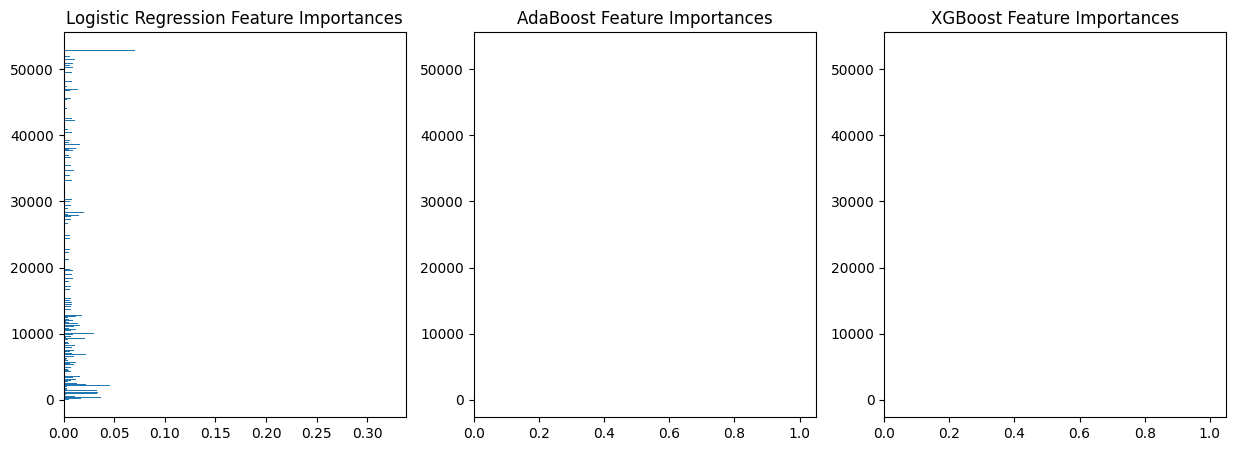

Cross-Validation AUC Scores:
                 Model  Mean AUC   Std AUC
0  Logistic Regression  0.995238  0.014286
1             AdaBoost  1.000000  0.000000
2              XGBoost  1.000000  0.000000


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your dataset is loaded here
# Example:
# X = your_feature_matrix
# y = your_target_vector

# Initialize the models
lr = LogisticRegression(max_iter=500)
ada = AdaBoostClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Setup KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform KFold cross-validation
lr_scores = cross_val_score(lr, X, y, cv=kf, scoring='roc_auc')
ada_scores = cross_val_score(ada, X, y, cv=kf, scoring='roc_auc')
xgb_scores = cross_val_score(xgb, X, y, cv=kf, scoring='roc_auc')

# Calculate mean and standard deviation of AUC scores
results_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'AdaBoost', 'XGBoost'],
    'Mean AUC': [lr_scores.mean(), ada_scores.mean(), xgb_scores.mean()],
    'Std AUC': [lr_scores.std(), ada_scores.std(), xgb_scores.std()]
})

# Fit models to the whole dataset for feature importance extraction
lr.fit(X, y)
ada.fit(X, y)
xgb.fit(X, y)

# Feature importance extraction
importance_lr = np.abs(lr.coef_[0])
importance_ada = ada.feature_importances_
importance_xgb = xgb.feature_importances_

# Plot feature importances
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.barh(range(len(importance_lr)), importance_lr, align='center')
plt.title('Logistic Regression Feature Importances')

plt.subplot(1, 3, 2)
plt.barh(range(len(importance_ada)), importance_ada, align='center')
plt.title('AdaBoost Feature Importances')

plt.subplot(1, 3, 3)
plt.barh(range(len(importance_xgb)), importance_xgb, align='center')
plt.title('XGBoost Feature Importances')

plt.show()

# Display the results
print("Cross-Validation AUC Scores:")
print(results_cv)

In [32]:
import pandas as pd

# Assuming your data is in a DataFrame df
df = pd.DataFrame(X)  # Replace with your actual feature data
df['target'] = y

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [33]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check if there is any overlap between train and test sets
overlap = set(pd.util.hash_pandas_object(pd.DataFrame(X_train)).values) & set(pd.util.hash_pandas_object(pd.DataFrame(X_test)).values)
print(f"Number of overlapping rows between train and test sets: {len(overlap)}")

Number of overlapping rows between train and test sets: 0


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a preprocessing and modeling pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500))
])

# Create a preprocessing and modeling pipeline for AdaBoost
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostClassifier())
])

# Create a preprocessing and modeling pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Fit the models using the pipeline
lr_pipeline.fit(X_train, y_train)
ada_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Evaluate the models
lr_cv_scores = cross_val_score(lr_pipeline, X, y, cv=kf, scoring='roc_auc')
ada_cv_scores = cross_val_score(ada_pipeline, X, y, cv=kf, scoring='roc_auc')
xgb_cv_scores = cross_val_score(xgb_pipeline, X, y, cv=kf, scoring='roc_auc')

# Calculate mean and standard deviation of AUC scores
results_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'AdaBoost', 'XGBoost'],
    'Mean AUC': [lr_cv_scores.mean(), ada_cv_scores.mean(), xgb_cv_scores.mean()],
    'Std AUC': [lr_cv_scores.std(), ada_cv_scores.std(), xgb_cv_scores.std()]
})

print("Cross-Validation AUC Scores with Preprocessing:")
print(results_cv)

Cross-Validation AUC Scores with Preprocessing:
                 Model  Mean AUC   Std AUC
0  Logistic Regression   0.95619  0.066113
1             AdaBoost   1.00000  0.000000
2              XGBoost   1.00000  0.000000
